In [34]:
from sympy.abc import t, r, u, v, a, b
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt


x = (a + b*v/2*sp.cos(u/2))*sp.cos(u)
y = (a + b*v/2*sp.cos(u/2))*sp.sin(u)
z = v/2 * sp.sin(u/2)

param = (x, y, z)

In [35]:
from itertools import product
from functools import reduce

def d2(expr, syms):
    n = len(syms)
    combs = product(*(n*[syms]))
    ijth_term = lambda i, j: expr.diff(i)*expr.diff(j)
    return sp.Array([reduce(ijth_term, comb) for comb in combs]).reshape(2, 2)

def line_element(param, syms):
    n = len(syms)
    componenets = sp.Array([d2(c, syms=syms) for c in param])
    return reduce(sp.Array.__add__, componenets).simplify()

le = line_element(param, (u, v))
le

[[a**2 + a*b*v*cos(u/2) + 3*b**2*v**2*cos(u/2)**2/16 + b**2*v**2/16 + v**2*cos(u/2)**2/16, v*(1 - b**2)*sin(u)/16], [v*(1 - b**2)*sin(u)/16, b**2*cos(u/2)**2/4 - cos(u/2)**2/4 + 1/4]]

In [38]:
(x**2 + y**2 + z**2).simplify()

a**2 + a*b*v*cos(u/2) + b**2*v**2*cos(u/2)**2/4 - v**2*cos(u/2)**2/4 + v**2/4

In [31]:
def mob(u, v):
    x = (a + b*v/2*np.cos(u/2))*np.cos(u)
    y = (a + b*v/2*np.cos(u/2))*np.sin(u)
    z = v/2 * np.sin(u/2)

    return x, y, z

def d(x, y, z, a, b, c):
    return np.sqrt((x-a)**2 + (y-b)**2 + (z-c)**2)

u = np.linspace(0, 2*np.pi, 100)
v = np.linspace(-1, 1, 100)

a = 5
b = 2

u, v = np.meshgrid(u, v)

x = (a + b*v/2*np.cos(u/2))*np.cos(u)
y = (a + b*v/2*np.cos(u/2))*np.sin(u)
z = v/2 * np.sin(u/2)

n=600

u_ = np.linspace(0, 6*np.pi, n)
Xn, Yn, Zn = np.zeros((3, n))#mob(u_, np.array(n*[-1]))
Xp, Yp, Zp = mob(u_, np.array(n*[1]))

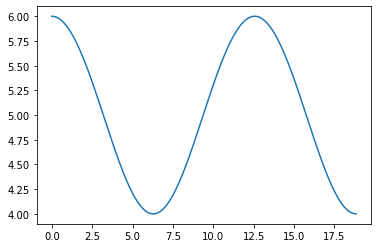

In [32]:
plt.plot(u_, d(Xn, Yn, Zn, Xp, Yp, Zp))